In [1]:
addpath(genpath('./'))
addpath(genpath('../..'))

In [2]:
addpath(genpath('../../..'))
load_all_processed

Could not find existing all_data variable. Loading from disk...
Loading data from participant 1... FAILED.
Loading data from participant 2... Warning: The new variables being added to the table have fewer rows than the table. They have been extended with rows containing default values.
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 11)
  In load_all_processed (line 23)
gamechange
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 41)
  In load_all_processed (line 23)
> In tabular/subsasgnParens (line 327)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 71)
  In load_all_processed (line 23)
soundchange
SUCCESS!
Loading data from participant 3... FAILED.
Loading data from participant 4... Warning: The new variables being added to the table have fewer rows than the tabl

In [3]:
interview_joystick

Using pre-existing all_data variable.
Extracting interview {x} joystick data from participant 2...
Extracting interview {x} joystick data from participant 4...
Extracting interview {x} joystick data from participant 5...
Extracting interview {x} joystick data from participant 6...
Extracting interview {x} joystick data from participant 7...
Extracting interview {x} joystick data from participant 8...
Extracting interview {x} joystick data from participant 9...
Extracting interview {x} joystick data from participant 10...
Extracting interview {x} joystick data from participant 12...
Extracting interview {x} joystick data from participant 13...
Extracting interview {x} joystick data from participant 14...
Extracting interview {x} joystick data from participant 15...
Extracting interview {x} joystick data from participant 16...
Extracting interview {x} joystick data from participant 17...
Extracting interview {x} joystick data from participant 18...
Extracting interview {x} joystick data 

Error using writetable (line 124)
Unable to open file './experiments/results/interview_joystick_asym.csv' for writing:

No such file or directory

Error in interview_joystick (line 57)
writetable(result, './experiments/results/interview_joystick_asym.csv')



In [4]:
time_window_search

Using pre-existing all_data variable.
Extracting interview {x} joystick data from participant 2...
Extracting interview {x} joystick data from participant 4...
Extracting interview {x} joystick data from participant 5...
Extracting interview {x} joystick data from participant 6...
Extracting interview {x} joystick data from participant 7...
Extracting interview {x} joystick data from participant 8...
Extracting interview {x} joystick data from participant 9...
Extracting interview {x} joystick data from participant 10...
Extracting interview {x} joystick data from participant 12...
Extracting interview {x} joystick data from participant 13...
Extracting interview {x} joystick data from participant 14...
Extracting interview {x} joystick data from participant 15...
Extracting interview {x} joystick data from participant 16...
Extracting interview {x} joystick data from participant 17...
Extracting interview {x} joystick data from participant 18...
Extracting interview {x} joystick data 

In [48]:
%%file feeltrace_word_eval_window.m

function [window_score_table] = feeltrace_word_eval_window(result, f)
    window_x = 1:500:2001;
    window_y = 2000:-500:0;
    windows = {};
    for x = window_x
        for y = window_y
            windows = [windows genvarname(['w_' num2str(x) '_' num2str(y)])];
        end
    end
    p_mean = varfun(f,result,'InputVariables', windows,...
           'GroupingVariables', {'pnum', 'calibrated_words', 'calibrated_values'});

    uniq_words = unique(p_mean.calibrated_words);
    word_keys = 1:length(uniq_words);
    word_code_map = containers.Map(cellstr(uniq_words), word_keys);

    window_score_table = table;

    fprintf('calculating score with sequence obtained by %s of multiple occurence of the same word. \n', char(f));
    for w = windows
        mean_col = genvarname([char(f) '_' w{1}]);
        p_feeltrace = sortrows(p_mean, {'pnum', mean_col});
        p_cali_word = sortrows(p_mean, {'pnum', 'calibrated_values'});

        for i = 1:23
            seq1 = p_feeltrace(p_feeltrace.pnum == i, :).calibrated_words;
            seq2 = p_cali_word(p_cali_word.pnum == i, :).calibrated_words;
            window_score_table.('pnum')(i) = i;
            if ~isempty(seq1)
                seq1_coded = cellfun(@(x) word_code_map(x), seq1);
                seq2_coded = cellfun(@(x) word_code_map(x), seq2);
                score = corr(seq1_coded, seq2_coded, 'Type', 'Kendall');
                window_score_table.(genvarname(['score_' w{1}]))(i) = score;
            end
        end
    end
end

Created file '/Users/Qianqian/FQQ/College/Work/SPIN/EEG/EEGTouch/matlab/validation/feeltrace_word_eval_window.m'.


In [99]:
window_score_table = feeltrace_word_eval_window(result, @mean);

calculating score with sequence obtained by mean of multiple occurence of the same word. 
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line

From the result below, best window -500 1500

In [81]:
window_score_table


window_score_table =

  23x26 table

    pnum    score_w_1_2000    score_w_1_1500    score_w_1_1000    score_w_1_500    score_w_1_0    score_w_501_2000    score_w_501_1500    score_w_501_1000    score_w_501_500    score_w_501_0    score_w_1001_2000    score_w_1001_1500    score_w_1001_1000    score_w_1001_500    score_w_1001_0    score_w_1501_2000    score_w_1501_1500    score_w_1501_1000    score_w_1501_500    score_w_1501_0    score_w_2001_2000    score_w_2001_1500    score_w_2001_1000    score_w_2001_500    score_w_2001_0
    ____    ______________    ______________    ______________    _____________    ___________    ________________    ________________    ________________    _______________    _____________    _________________    _________________    _________________    ________________    ______________    _________________    _________________    _________________    ________________    ______________    _________________    _________________    _________________    _________

In [82]:
mean(window_score_table{:, 2:end})


ans =

  Columns 1 through 7

    0.0005    0.0080    0.0000   -0.0251    0.0181   -0.0201    0.0200

  Columns 8 through 14

   -0.0088   -0.0823   -0.0099   -0.0399   -0.0022   -0.0166   -0.0621

  Columns 15 through 21

    0.0050    0.0088    0.0159   -0.0048   -0.0510   -0.0094   -0.0137

  Columns 22 through 25

   -0.0087   -0.0160   -0.0289    0.0122



In [100]:
window_score_sum = sum(window_score_table{:, 2:end} > 0, 1);
[sorted, idx] = sort(window_score_sum);
mean_score_table = array2table(sorted', 'VariableNames', {'count_of_positive_scores'}, 'RowNames', windows(idx))


mean_score_table =

  25x1 table

                   count_of_positive_scores
                   ________________________

    w_1501_500                 3           
    w_501_500                  4           
    w_1001_500                 4           
    w_1_1000                   6           
    w_1_500                    6           
    w_2001_500                 6           
    w_501_1000                 7           
    w_501_0                    7           
    w_1001_2000                7           
    w_1501_1000                7           
    w_1501_0                   7           
    w_2001_2000                7           
    w_2001_1500                7           
    w_2001_1000                7           
    w_2001_0                   7           
    w_1_2000                   8           
    w_1_0                      8           
    w_1001_1500                8           
    w_1001_1000                8           
    w_1501_2000                8        

- Participants that are really consistent: 5, 16, 20
- Participants that are somewhat consistent (>0.2): 4, 7, 9, 14, 17
- Participants that has score lower than -0.2: 10, 22

In [65]:
max(window_score_table{:, 2:end}, [], 2)


ans =

         0
         0
         0
    0.2821
    0.8095
    0.1429
    0.2143
    0.1515
    0.2364
   -0.0909
         0
         0
    0.2000
    0.4444
    0.0545
    0.4848
    0.3889
    0.4182
    0.1026
    0.4615
    0.2000
    0.1636
    0.3333



In [66]:
p_feeltrace = sortrows(p_mean, {'pnum', 'mean_w_501_1500'});
p_cali_word = sortrows(p_mean, {'pnum', 'calibrated_values'});
seq1 = p_feeltrace(p_feeltrace.pnum == 16, :).calibrated_words
seq2 = p_cali_word(p_cali_word.pnum == 16, :).calibrated_words


seq1 = 

  12x1 string array

    "Curious"
    "Accomplished"
    "Satisfied"
    "Dread"
    "Cautious"
    "Confused"
    "Anxious"
    "Frustrated"
    "Excited"
    "Annoyance"
    "Hopeful"
    "Resigned"


seq2 = 

  12x1 string array

    "Accomplished"
    "Hopeful"
    "Satisfied"
    "Confused"
    "Dread"
    "Cautious"
    "Curious"
    "Excited"
    "Resigned"
    "Annoyance"
    "Frustrated"
    "Anxious"



In [107]:
window_score_table = feeltrace_word_eval_window(result, @max)

calculating score with sequence obtained by max of multiple occurence of the same word. 
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 

In [102]:
window_score_sum = sum(window_score_table{:, 2:end} > 0, 1);
[sorted, idx] = sort(window_score_sum);
max_score_table = array2table(sorted', 'VariableNames', {'count_of_positive_scores'}, 'RowNames', windows(idx))


max_score_table =

  25x1 table

                   count_of_positive_scores
                   ________________________

    w_2001_0                   6           
    w_1_2000                   8           
    w_501_2000                 8           
    w_501_1500                 8           
    w_501_0                    8           
    w_1001_0                   8           
    w_1501_0                   8           
    w_501_1000                 9           
    w_501_500                  9           
    w_1001_500                 9           
    w_2001_500                 9           
    w_1_1500                  10           
    w_1001_2000               10           
    w_1501_500                10           
    w_1_0                     11           
    w_1001_1000               11           
    w_1_1000                  12           
    w_1_500                   12           
    w_1001_1500               12           
    w_1501_2000               12         

In [119]:
[val, idx] = max(window_score_table{:, 2:end}, [], 2);
t = array2table([(1:1:23)' val], 'VariableNames', {'pnum', 'max_corr_score'});
t.best_time_window = windows(idx)';
t


t =

  23x3 table

    pnum    max_corr_score    best_time_window
    ____    ______________    ________________

      1               0        'w_1_2000'     
      2         0.21212        'w_1501_0'     
      3               0        'w_1_2000'     
      4         0.28205        'w_1001_0'     
      5         0.90476        'w_1001_0'     
      6        0.071429        'w_1001_2000'  
      7        0.071429        'w_2001_2000'  
      8         0.15152        'w_1_500'      
      9         0.41818        'w_1001_500'   
     10        -0.18182        'w_1_2000'     
     11               0        'w_1_2000'     
     12         0.42424        'w_2001_0'     
     13        0.090909        'w_1501_2000'  
     14         0.38889        'w_1_500'      
     15         0.23636        'w_1501_2000'  
     16         0.33333        'w_1001_1000'  
     17         0.61111        'w_501_1000'   
     18         0.49091        'w_1_2000'     
     19        -0.10256        'w_1_200

In [103]:
window_score_table = feeltrace_word_eval_window(result, @min)

calculating score with sequence obtained by min of multiple occurence of the same word. 
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 

In [91]:
mean(window_score_table{:, 2:end})


ans =

  Columns 1 through 7

    0.0559    0.0814    0.0591    0.0686    0.0348    0.0398    0.0285

  Columns 8 through 14

    0.0089    0.0371   -0.0021    0.0307    0.0179    0.0154    0.0188

  Columns 15 through 21

    0.0096    0.0111    0.0058    0.0137    0.0273    0.0208   -0.0061

  Columns 22 through 25

   -0.0043   -0.0222   -0.0222    0.0314



In [104]:
window_score_sum = sum(window_score_table{:, 2:end} > 0, 1);
[sorted, idx] = sort(window_score_sum);
min_score_table = array2table(sorted', 'VariableNames', {'count_of_positive_scores'}, 'RowNames', windows(idx))


min_score_table =

  25x1 table

                   count_of_positive_scores
                   ________________________

    w_2001_1000                7           
    w_501_0                    8           
    w_1501_2000                8           
    w_1501_1500                8           
    w_2001_2000                8           
    w_2001_1500                8           
    w_501_2000                 9           
    w_501_1500                 9           
    w_501_500                  9           
    w_1001_1500                9           
    w_1001_0                   9           
    w_1501_1000                9           
    w_1501_0                   9           
    w_1_0                     10           
    w_501_1000                10           
    w_1001_2000               10           
    w_1001_1000               10           
    w_1001_500                10           
    w_2001_500                10           
    w_2001_0                  10         

In [161]:
max(window_score_table{:, 2:end}, [], 2)


ans =

         0
    0.0909
         0
    0.5128
    0.8095
    0.0714
    0.3571
    0.1212
    0.1273
   -0.1818
         0
   -0.0606
   -0.1636
    0.5000
   -0.2727
    0.2727
    0.2222
    0.1636
    0.1026
    0.4872
    0.0667
    0.3455
    0.0606



In [105]:
window_score_table = feeltrace_word_eval_window(result, @median)

calculating score with sequence obtained by median of multiple occurence of the same word. 
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (line 457)
  In tabular/subsasgn (line 67)
  In feeltrace_word_eval_window (line 29)
> In tabular/subsasgnDot (li

In [94]:
mean(window_score_table{:, 2:end})


ans =

  Columns 1 through 7

    0.0396    0.0508    0.0593   -0.0030    0.0056    0.0199    0.0302

  Columns 8 through 14

   -0.0079   -0.0042   -0.0047    0.0171    0.0071    0.0484    0.0247

  Columns 15 through 21

    0.0296    0.0272    0.0025    0.0196    0.0264    0.0502    0.0036

  Columns 22 through 25

   -0.0027    0.0502    0.0554    0.0756



In [106]:
window_score_sum = sum(window_score_table{:, 2:end} > 0, 1);
[sorted, idx] = sort(window_score_sum);
median_score_table = array2table(sorted', 'VariableNames', {'count_of_positive_scores'}, 'RowNames', windows(idx))


median_score_table =

  25x1 table

                   count_of_positive_scores
                   ________________________

    w_501_500                  7           
    w_1501_1500                7           
    w_2001_2000                7           
    w_1001_1500                8           
    w_1501_1000                8           
    w_2001_1500                8           
    w_1_2000                   9           
    w_1_1500                   9           
    w_1_500                    9           
    w_501_2000                 9           
    w_501_1500                 9           
    w_501_1000                 9           
    w_501_0                    9           
    w_1001_500                 9           
    w_1501_2000                9           
    w_1501_500                 9           
    w_1_0                     10           
    w_1001_2000               10           
    w_1001_0                  10           
    w_2001_1000               10      

In [160]:
max(window_score_table{:, 2:end}, [], 2)


ans =

         0
    0.0909
         0
    0.5128
    0.8095
    0.0714
    0.3571
    0.1212
    0.1273
   -0.1818
         0
   -0.0606
   -0.1636
    0.5000
   -0.2727
    0.2727
    0.2222
    0.1636
    0.1026
    0.4872
    0.0667
    0.3455
    0.0606



In [165]:
X = [2; 1; 3; 4];
corr(X, X, 'Type', 'Kendall')


ans =

     1



In [4]:
raw_table = varfun(@sign,result,'InputVariables', {'calibrated_values', 'w1abs', 'w1slp'},...
           'GroupingVariables', {'pnum', 'calibrated_words'})


raw_table =

  742x6 table

    pnum    calibrated_words    GroupCount    sign_calibrated_values    sign_w1abs    sign_w1slp
    ____    ________________    __________    ______________________    __________    __________

      2      "Accomplished"          3                  -1                  -1            -1    
      2      "Accomplished"          3                  -1                   1            -1    
      2      "Accomplished"          3                  -1                  -1            -1    
      2      "Alert"                 5                   1                  -1             1    
      2      "Alert"                 5                   1                   1             1    
      2      "Alert"                 5                   1                  -1            -1    
      2      "Alert"                 5                   1                  -1            -1    
      2      "Alert"                 5                   1                   1            -1    


In [5]:
non_zero_table = raw_table(raw_table.sign_calibrated_values ~= 0, :);
sum(non_zero_table.sign_calibrated_values == non_zero_table.sign_w1abs) / length(non_zero_table.sign_w1abs)
sum(non_zero_table.sign_calibrated_values == non_zero_table.sign_w1slp) / length(non_zero_table.sign_w1slp)


ans =

    0.6858


ans =

    0.6158



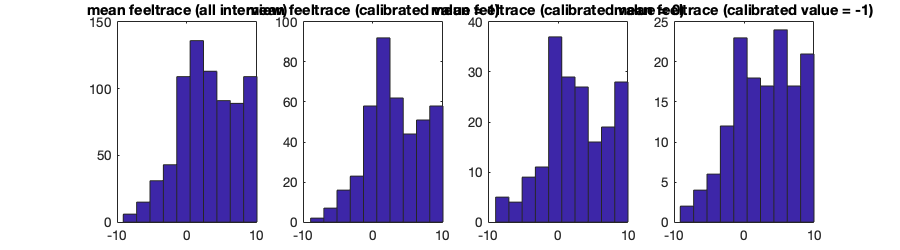

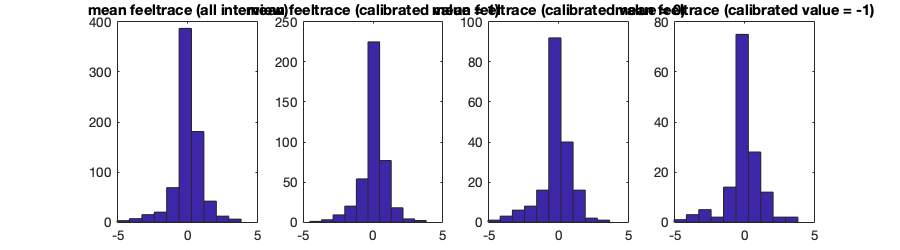

In [68]:
%plot -w 900 -h 250
result.zscore_w1abs = zscore(result.w1abs);
result.zscore_w1slp = zscore(result.w1slp);
zero_table = result(result.calibrated_values == 0, :);
figure;
subplot(1,4,1)
hist(result.w1abs)
title('mean feeltrace (all interview)')
subplot(1,4,2)
hist(result{raw_table.sign_calibrated_values == 1, {'w1abs'}})
title('mean feeltrace (calibrated value = 1)')
subplot(1,4,3)
hist(zero_table.w1abs)
title('mean feeltrace (calibrated value = 0)')
subplot(1,4,4)
hist(result{raw_table.sign_calibrated_values == -1, {'w1abs'}})
title('mean feeltrace (calibrated value = -1)')

figure;
subplot(1,4,1)
hist(result.zscore_w1slp)
title('mean feeltrace (all interview)')
subplot(1,4,2)
hist(result{raw_table.sign_calibrated_values == 1, {'zscore_w1slp'}})
title('mean feeltrace (calibrated value = 1)')
subplot(1,4,3)
hist(zero_table.zscore_w1slp)
title('mean feeltrace (calibrated value = 0)')
subplot(1,4,4)
hist(result{raw_table.sign_calibrated_values == -1, {'zscore_w1slp'}})
title('mean feeltrace (calibrated value = -1)')

In [92]:
% t test for if each of the case 
% mean(result{raw_table.sign_calibrated_values == -1, {'zscore_w1slp'}})
ttest(result.w1slp, 0, 'Tail', 'right')
ttest(result{raw_table.sign_calibrated_values == 1, {'w1slp'}}, 0, 'Tail', 'right')
ttest(result{raw_table.sign_calibrated_values == 0, {'w1slp'}}, 0)
ttest(result{raw_table.sign_calibrated_values == -1, {'w1slp'}}, 0, 'Tail', 'left')

ttest(result.zscore_w1abs, 0, 'Tail', 'right')
ttest(result{raw_table.sign_calibrated_values == 1, {'zscore_w1abs'}}, 0, 'Tail', 'right')
ttest(result{raw_table.sign_calibrated_values == 0, {'zscore_w1abs'}}, 0)
ttest(result{raw_table.sign_calibrated_values == -1, {'zscore_w1abs'}}, 0, 'Tail', 'left')


ans =

     1


ans =

     1


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0


ans =

     0



In [7]:
[r_val, p_val] = corr(result{:,{'calibrated_values'}}, result{:, {'w1abs'}})
[r_slope, p_slope] = corr(result{:,{'calibrated_values'}}, result{:, {'w1slp'}})


r_val =

    0.1711


p_val =

   2.7616e-06


r_slope =

    0.2365


p_slope =

   6.8913e-11



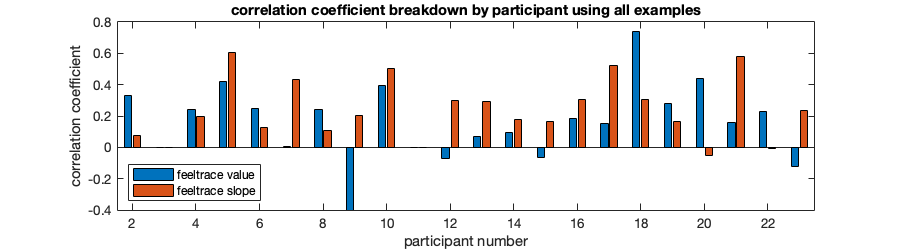

In [132]:
value_corr = [];
slope_corr = [];
for i=2:23
    pfile = result(result.pnum == i, :);
    vcorr = 0;
    scorr = 0;
    if ~isempty(pfile)
        vcorr = corr(pfile{:,{'calibrated_values'}}, pfile{:, {'w1abs'}});
        scorr = corr(pfile{:,{'calibrated_values'}}, pfile{:, {'w1slp'}});
    end
    value_corr = [value_corr vcorr];
    slope_corr = [slope_corr scorr];
end

bar(2:23, [value_corr' slope_corr'])
title('correlation coefficient breakdown by participant using all examples')
legend('feeltrace value', 'feeltrace slope', 'Location', 'SouthWest')
xlabel('participant number')
ylabel('correlation coefficient')

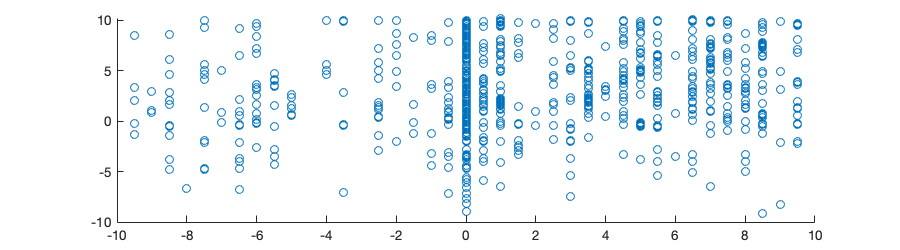

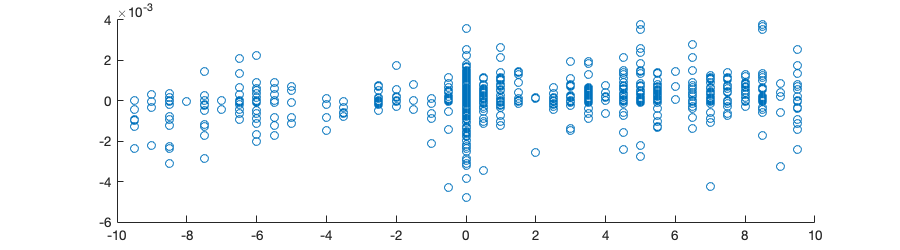

In [105]:
scatter(result{:,{'calibrated_values'}}, result{:, {'w1abs'}})
figure;
scatter(result{:,{'calibrated_values'}}, result{:, {'w1slp'}})

In [8]:
mean_table = varfun(@mean,result,'InputVariables', {'calibrated_values', 'w1abs', 'w1slp'},...
           'GroupingVariables', {'pnum', 'calibrated_words'})


mean_table =

  217x6 table

    pnum    calibrated_words    GroupCount    mean_calibrated_values    mean_w1abs    mean_w1slp 
    ____    ________________    __________    ______________________    __________    ___________

      2      "Accomplished"          3                   -1               -1.3302     -0.00079847
      2      "Alert"                 5                  0.5              -0.34742     -6.7698e-06
      2      "Anxious"               1                    6               0.70423        0.001466
      2      "Cautious"              4                 -2.5              -0.30516       0.0001662
      2      "Confused"              8                 -6.5              -0.48122      0.00046474
      2      "Dread"                 1                    0                 8.216     -0.00078287
      2      "Frustrated"            7                  1.5                1.4286      0.00057273
      2      "Hopeful"               8                  4.5                 4.331      

In [10]:
[r_val, p_val] = corr(mean_table{:,{'mean_calibrated_values'}}, mean_table{:, {'mean_w1abs'}})
[r_slope, p_slope] = corr(mean_table{:,{'mean_calibrated_values'}}, mean_table{:, {'mean_w1slp'}})


r_val =

    0.2535


p_val =

   1.5987e-04


r_slope =

    0.3403


p_slope =

   2.7705e-07



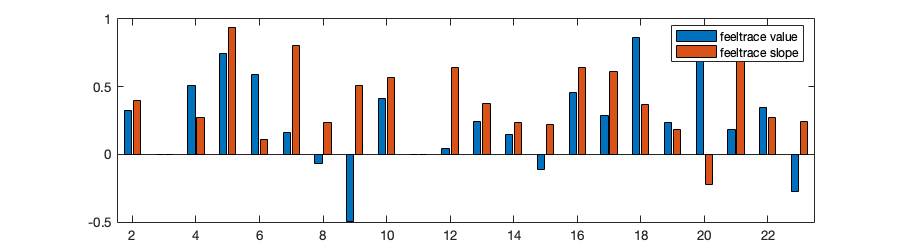

In [119]:
value_corr = [];
slope_corr = [];
for i=2:23
    pfile = mean_table(mean_table.pnum == i, :);
    vcorr = 0;
    scorr = 0;
    if ~isempty(pfile)
        vcorr = corr(pfile{:,{'mean_calibrated_values'}}, pfile{:, {'mean_w1abs'}});
        scorr = corr(pfile{:,{'mean_calibrated_values'}}, pfile{:, {'mean_w1slp'}});
    end
    value_corr = [value_corr vcorr];
    slope_corr = [slope_corr scorr];
end

bar(2:23, [value_corr' slope_corr'])
legend('feeltrace value', 'feeltrace slope')

In [12]:
sign_mean_table = varfun(@sign,mean_table,'InputVariables', {'mean_calibrated_values', 'mean_w1abs', 'mean_w1slp'},...
           'GroupingVariables', {'pnum', 'calibrated_words'})


sign_mean_table =

  217x6 table

    pnum    calibrated_words    GroupCount    sign_mean_calibrated_values    sign_mean_w1abs    sign_mean_w1slp
    ____    ________________    __________    ___________________________    _______________    _______________

      2      "Accomplished"         1                     -1                       -1                 -1       
      2      "Alert"                1                      1                       -1                 -1       
      2      "Anxious"              1                      1                        1                  1       
      2      "Cautious"             1                     -1                       -1                  1       
      2      "Confused"             1                     -1                       -1                  1       
      2      "Dread"                1                      0                        1                 -1       
      2      "Frustrated"           1                      1        

In [29]:
non_zero_table = sign_mean_table(sign_mean_table.sign_mean_calibrated_values ~= 0, :);
sum(non_zero_table.sign_mean_calibrated_values == non_zero_table.sign_mean_w1abs) / length(non_zero_table.sign_mean_w1abs)
sum(non_zero_table.sign_mean_calibrated_values == non_zero_table.sign_mean_w1slp) / length(non_zero_table.sign_mean_w1slp)


ans =

    0.7055



In [18]:
sum(sign_mean_table.sign_mean_calibrated_values == 0) / length(sign_mean_table.sign_mean_w1slp)


ans =

    0.3272



In [95]:
[h, p] = ttest(result.calibrated_values, result.w1abs)


h =

     1


p =

   6.0072e-11



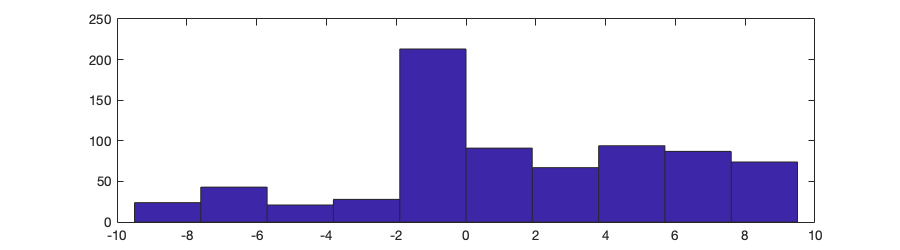

In [97]:
hist(result.calibrated_values)

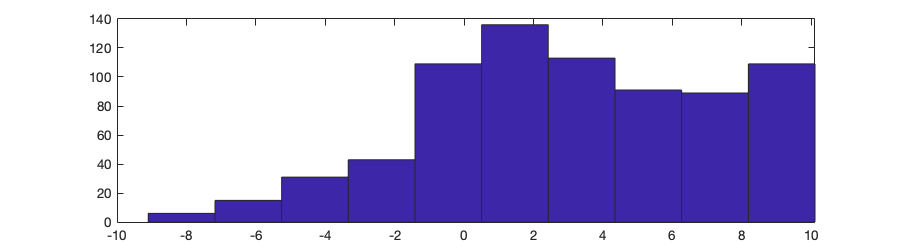

In [98]:
hist(result.w1abs)

In [10]:
result(1,:)


ans =

  1x17 table

    pnum    timestamp_ms    emotion_words    calibrated_words    calibrated_values     w1abs      w1var         w1slp         w1slp2        w2abs       w2var         w2slp         w2slp2       w3abs       w3var         w3slp         w3slp2   
    ____    ____________    _____________    ________________    _________________    _______    ________    ___________    ___________    _______    _________    ___________    __________    _______    _________    ___________    ___________

     2         51167         "confused"         "Confused"             -6.5           -3.7089    0.005984    -4.7459e-05    -4.1634e-05    -3.8028    0.0035929    -4.7303e-05    2.4673e-05    -2.9671    0.0038298    -3.7967e-05    -3.3308e-05



In [30]:
x_original = result{:,{'calibrated_values'}};
x = [ones(length(x_original), 1) x_original];
y_value = result{:,{'w1abs'}};
y_slope = result{:,{'w1slp'}};

In [12]:
% linear regression least square
b_value = x \ y_value;
b_slope = x \ y_slope;
y_value_pred = x*b_value;
y_slope_pred = x*b_slope;

r_value = sqrt(1 - sum((y_value - y_value_pred).^2)/sum((y_value - mean(y_value_pred)).^2))
r_slope = sqrt(1 - sum((y_slope - y_slope_pred).^2)/sum((y_slope - mean(y_slope_pred)).^2))


r_value =

    0.1711


r_slope =

    0.2365



In [13]:
% sinusoidal y = a*sin(x) + b
x = [ones(length(x_original), 1) sin(pi/20 * x_original)];

y_value = result{:,{'w1abs'}};
y_slope = result{:,{'w1slp'}};

b_value = x \ y_value;
b_slope = x \ y_slope;
y_value_pred = x*b_value;
y_slope_pred = x*b_slope;

r_value = sqrt(1 - sum((y_value - y_value_pred).^2)/sum((y_value - mean(y_value_pred)).^2))
r_slope = sqrt(1 - sum((y_slope - y_slope_pred).^2)/sum((y_slope - mean(y_slope_pred)).^2))


r_value =

    0.1741


r_slope =

    0.2379



In [17]:
% sinusoidal y = a*sin(pi/20 x) + b
x_original = mean_table{:, {'mean_calibrated_values'}};
x = [ones(length(x_original), 1) sin(pi/20 * x_original)];

y_value = mean_table{:,{'mean_w1abs'}};
y_slope = mean_table{:,{'mean_w1slp'}};

b_value = x \ y_value;
b_slope = x \ y_slope;
y_value_pred = x*b_value;
y_slope_pred = x*b_slope;

r_value = sqrt(1 - sum((y_value - y_value_pred).^2)/sum((y_value - mean(y_value_pred)).^2))
r_slope = sqrt(1 - sum((y_slope - y_slope_pred).^2)/sum((y_slope - mean(y_slope_pred)).^2))


r_value =

    0.2585


r_slope =

    0.3371




r_value =

    0.1676


r_slope =

    0.2340



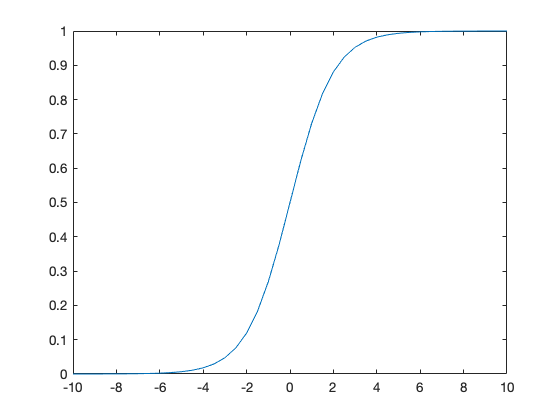

In [32]:
% sigmoid y = a/(1+e^-x) + b
sigmoid = @(x) 1./(1 + exp(-x));
x = [ones(length(x_original), 1) sigmoid(x_original)];
plot(-10:0.5:10, sigmoid(-10:0.5:10))

y_value = result{:,{'w1abs'}};
y_slope = result{:,{'w1slp'}};

b_value = x \ y_value;
b_slope = x \ y_slope;
y_value_pred = x*b_value;
y_slope_pred = x*b_slope;

r_value = sqrt(1 - sum((y_value - y_value_pred).^2)/sum((y_value - mean(y_value_pred)).^2))
r_slope = sqrt(1 - sum((y_slope - y_slope_pred).^2)/sum((y_slope - mean(y_slope_pred)).^2))

In [33]:
% sigmoid y = a/(1+e^-x) + b
x_original = mean_table{:, {'mean_calibrated_values'}};
x = [ones(length(x_original), 1) sigmoid(x_original)];

y_value = mean_table{:,{'mean_w1abs'}};
y_slope = mean_table{:,{'mean_w1slp'}};

b_value = x \ y_value;
b_slope = x \ y_slope;
y_value_pred = x*b_value;
y_slope_pred = x*b_slope;

r_value = sqrt(1 - sum((y_value - y_value_pred).^2)/sum((y_value - mean(y_value_pred)).^2))
r_slope = sqrt(1 - sum((y_slope - y_slope_pred).^2)/sum((y_slope - mean(y_slope_pred)).^2))


r_value =

    0.2547


r_slope =

    0.3234



In [35]:
b_slope


b_slope =

   1.0e-03 *

   -0.4302
    0.7229



In [46]:
pfile = all_data(2);
pfile = pfile{1};
pfile.eeg{1,:}


ans =

  1x66 single row vector

   1.0e+04 *

  Columns 1 through 7

         0   -0.6435   -0.8317    0.0493    0.1405   -0.7258   -0.0901

  Columns 8 through 14

    0.0243   -1.5975   -0.0523   -1.2130   -0.9681   -0.7662   -0.7192

  Columns 15 through 21

   -0.0766   -0.1987   -0.2314   -0.4754    0.2304    0.1553   -0.2996

  Columns 22 through 28

   -0.3827    0.2978   -0.0253    0.0639    0.4622   -0.2050   -0.3197

  Columns 29 through 35

   -0.3059   -0.5830   -0.5056   -0.4556   -0.7537   -0.3776   -0.3085

  Columns 36 through 42

   -0.5579   -0.4033   -0.4569   -0.8866   -0.4734   -0.2711    0.0548

  Columns 43 through 49

   -0.3288   -0.8349   -0.4756   -0.1615   -0.4474   -0.3317   -0.1839

  Columns 50 through 56

   -0.1867   -0.3014   -0.5287    0.2957   -0.2339    0.1069    0.2779

  Columns 57 through 63

   -0.6185   -0.6892   -0.0642   -0.2425   -0.7416   -0.1701    0.1147

  Columns 64 through 66

   -0.1325   -0.0695         0

